# CS 224n Assignment #3: Dependency Parsing

## 1. Machine Learning & Neural Networks (8 points)

(a) (4 points) Adam Optimizer  
Recall the standard Stochastic Gradient Descent update rule:

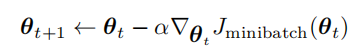

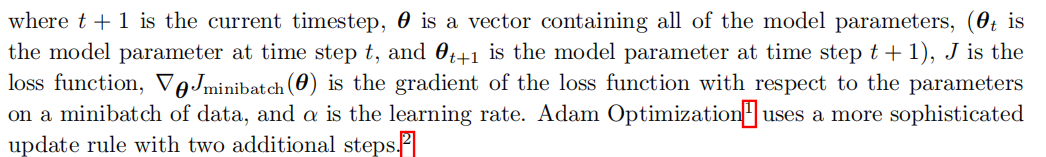

i. (2 points) First, Adam uses a trick called momentum by keeping track of m, a rolling average
of the gradients:

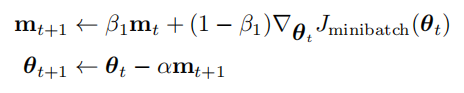

梯度下降，该公式提供了一个反向的作用力，所以会走得慢一些

ii. (2 points) Adam extends the idea of momentum with the trick of adaptive learning rates by
keeping track of v, a rolling average of the magnitudes of the gradients:（Adam通过跟踪自适应学习速率的技巧扩展了动量的概念，v是梯度大小的滚动平均值：）

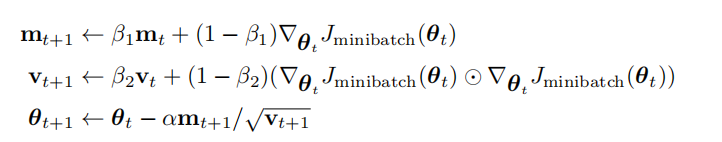

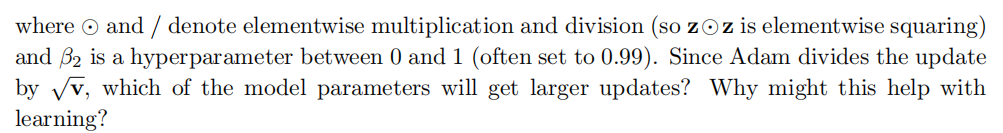

In [ ]:
会让梯度下降的速度动态调整，更利于拟合

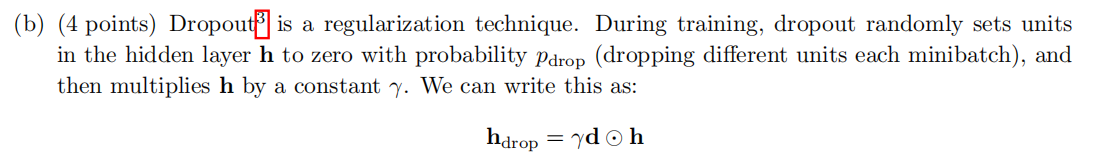

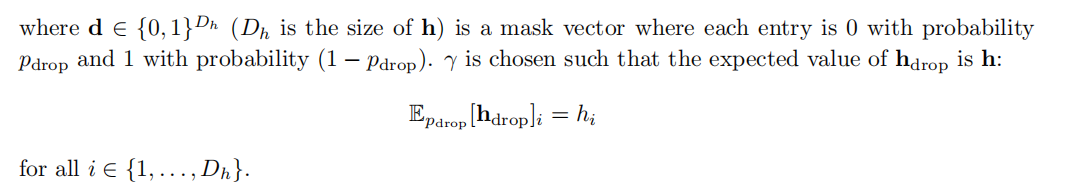

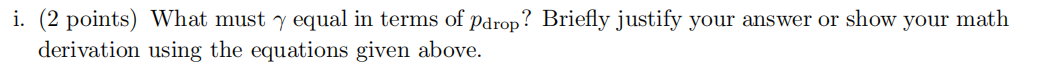

$$\begin{aligned} \mathbb{E}{p_{drop}}[{h}_{drop}]i &= \mathbb{E}{p_{drop}}[\gamma \mathbf{d} \circ \mathbf{h}]i \ &= \gamma \mathbb{E}{p_{drop}}[d_i h_i] \  \end{aligned} $$

ii. (2 points) Why should dropout be applied during training? Why should dropout NOT be applied during evaluation? (Hint: it may help to look at the paper linked above in the write-up.)

In [ ]:
如果在评估过程中应用dropout，将得到一个随机的keep_prob结果，不利于评估。

## 2. Neural Transition-Based Dependency Parsing (46 points)

In this section, you’ll be implementing a neural-network based dependency parser with the goal of maximizing performance on the UAS (Unlabeled Attachment Score) metric.

Before you begin, please follow the README to install all the needed dependencies for the assignment.
We will be using PyTorch 1.13.1 from https://pytorch.org/get-started/locally/ with the
CUDA option set to None, and the tqdm package – which produces progress bar visualizations throughout your training process. The official PyTorch website is a great resource that includes tutorials for
understanding PyTorch’s Tensor library and neural networks.

A dependency parser analyzes the grammatical structure of a sentence, establishing relationships between
head words, and words which modify those heads. There are multiple types of dependency parsers,
including transition-based parsers, graph-based parsers, and feature-based parsers. Your implementation
will be a transition-based parser, which incrementally builds up a parse one step at a time. At every step
it maintains a partial parse, which is represented as follows:

依赖解析器分析句子的语法结构，建立头部词和修改这些词的单词之间的关系。有多种类型的依赖解析器，包括基于转换的解析器、基于图的解析器和基于特性的解析器。您的实现将是一个基于转换的解析器，它一步一步地逐步构建一个解析。在每一步中，它都维护一个部分解析，其表示如下：

• A stack of words that are currently being processed.  
• A buffer of words yet to be processed.  
• A list of dependencies predicted by the parser.

Initially, the stack only contains ROOT, the dependencies list is empty, and the buffer contains all words
of the sentence in order. At each step, the parser applies a transition to the partial parse until its buffer
is empty and the stack size is 1. The following transitions can be applied:

• SHIFT: removes the first word from the buffer and pushes it onto the stack.（从缓冲区中删除第一个单词，并将其推到堆栈中）  
• LEFT-ARC: marks the second (second most recently added) item on the stack as a dependent of
the first item and removes the second item from the stack, adding a first word → second word
dependency to the dependency list.（将堆栈上的第二项（最近添加的第二项）标记为第一项的依赖项，并从堆栈中删除第二项，将第一个字→第二项依赖项添加到依赖项列表。）  
• RIGHT-ARC: marks the first (most recently added) item on the stack as a dependent of the second
item and removes the first item from the stack, adding a second word → first word dependency to
the dependency list.（将堆栈上的第一个（最近添加的）项标记为第二个项的依赖项，并从堆栈中删除第一个项，在依赖项列表中添加第二个单词→第一个单词依赖项。）

On each step, your parser will decide among the three transitions using a neural network classifier.

(a) (4 points) Go through the sequence of transitions needed for parsing the sentence “I attended lectures in the NLP class”. The dependency tree for the sentence is shown below. At each step, give
the configuration of the stack and buffer, as well as what transition was applied this step and what
new dependency was added (if any). The first three steps are provided below as an example

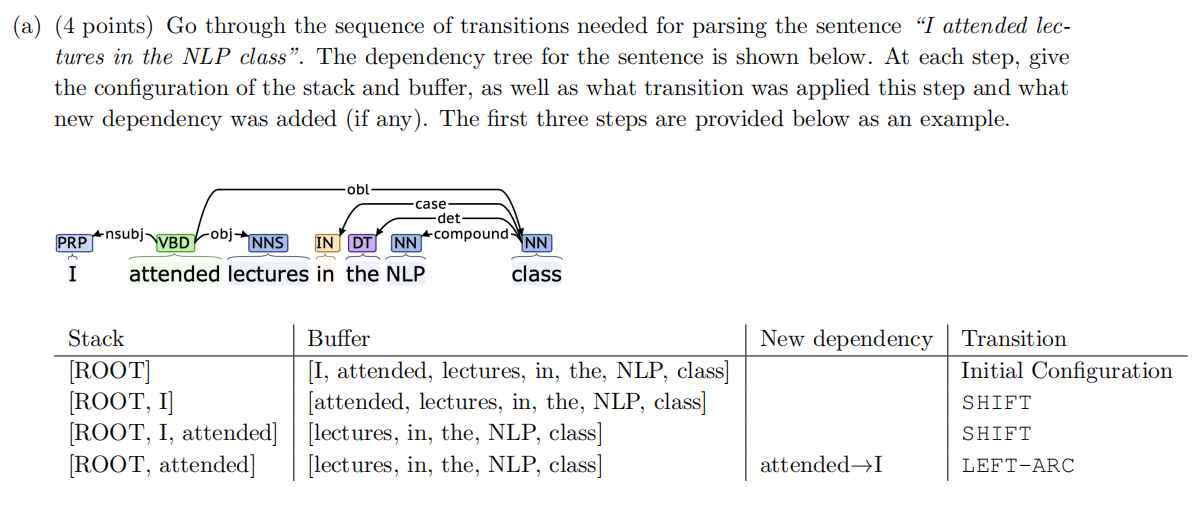

$$
\begin{array}{|l|l|l|l} Stack & Buffer & New dependency & Transition \\
\hline
[Root, attended, lectures] & [in, the, NLP, class] &   & SHIFT \\
[Root, attended] & [in, the, NLP, class] & attended \rightarrow lectures & RIGHT-ARC \\
[Root, attended, in] & [the, NLP, class] &   & SHIFT \\
[Root, attended, in, the] & [NLP, class] &   & SHIFT \\
[Root, attended, in, the, NLP] & [class] &   & SHIFT \\
[Root, attended, in, the, NLP, class] & [] &   & SHIFT \\
[Root, attended, in, the, class] & [] & class \rightarrow NLP & LEFT-ARE \\
[Root, attended, in, class] & [] & class \rightarrow the & LEFT-ARE \\
[Root, attended, class] & [] & class \rightarrow in & LEFT-ARE \\
[Root, class] & [] & class \rightarrow attended & RIGHT-ARE \\
[Root] & [] & Root \rightarrow class & RIGHT-ARE \\
\end{array}$$


(b) (2 points) A sentence containing n words will be parsed in how many steps (in terms of n)? Briefly
explain in 1–2 sentences why.

2n步，要将每个元素加进来，每个需要一步，共需要n步，再根据关系把每个元素消掉，这需要n步，共2n步

(c) (6 points) Implement the init and parse step functions in the PartialParse class in
parser transitions.py. This implements the transition mechanics your parser will use. You
can run basic (non-exhaustive) tests by running python parser transitions.py part c.

a3/student/parser_translations.py  
python parser_transitions.py part c

(d) (8 points) Our network will predict which transition should be applied next to a partial parse. We
could use it to parse a single sentence by applying predicted transitions until the parse is complete.
However, neural networks run much more efficiently when making predictions about batches of data
at a time (i.e., predicting the next transition for any different partial parses simultaneously). We
can parse sentences in minibatches with the following algorithm.

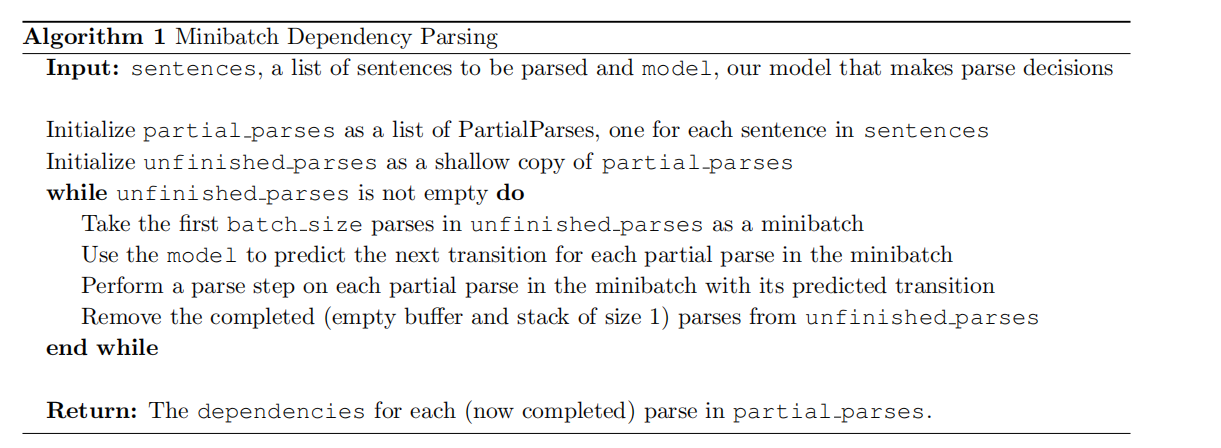

Implement this algorithm in the minibatch parse function in parser transitions.py. You
can run basic (non-exhaustive) tests by running python parser transitions.py part d.
Note: You will need minibatch parse to be correctly implemented to evaluate the model you will
build in part (e). However, you do not need it to train the model, so you should be able to complete
most of part (e) even if minibatch parse is not implemented yet.

a3/student/parser_translations.py  
python parser_transitions.py part d

(e) (12 points) We are now going to train a neural network to predict, given the state of the stack,
buffer, and dependencies, which transition should be applied next.

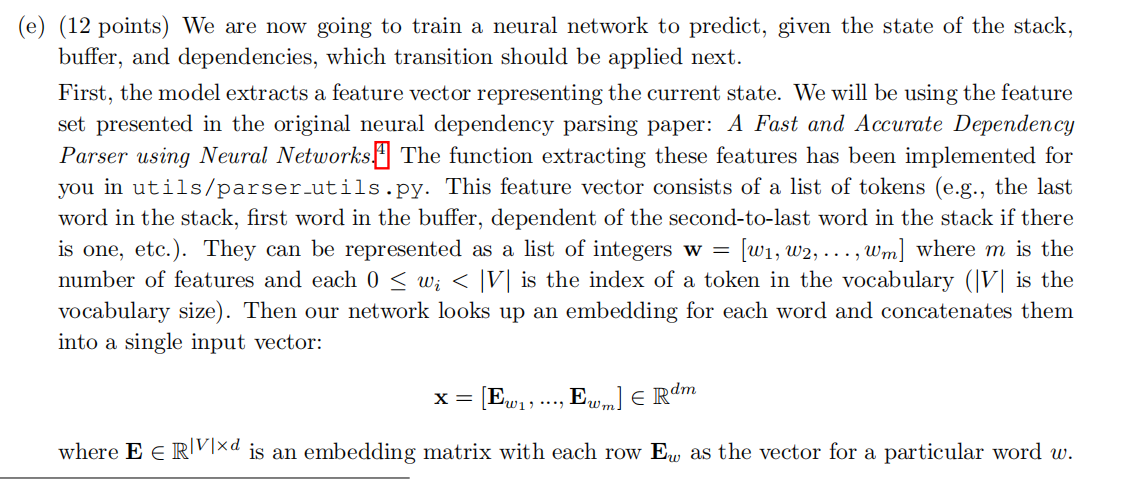

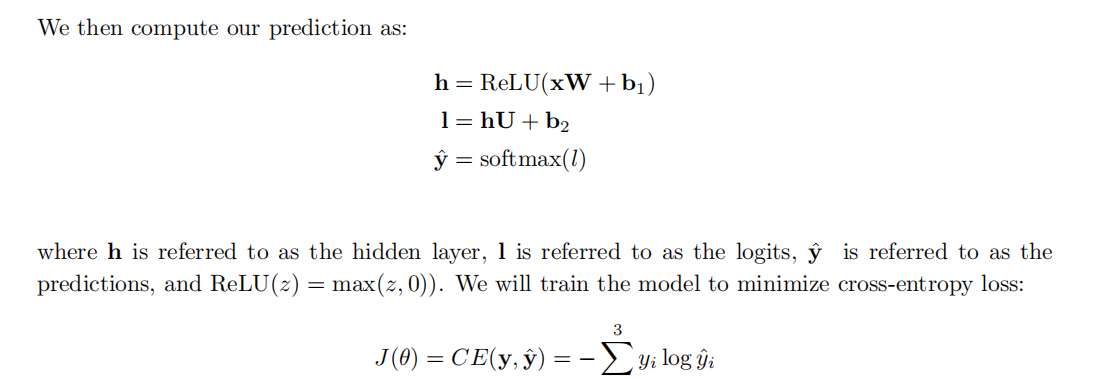

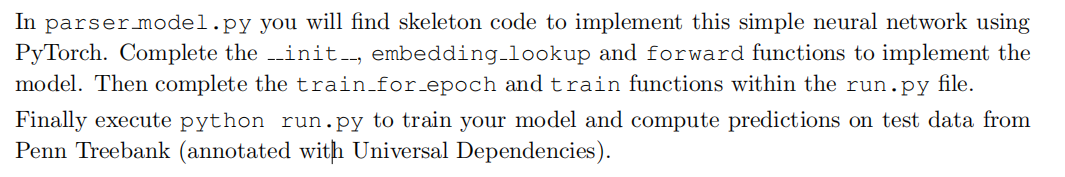

python run.py

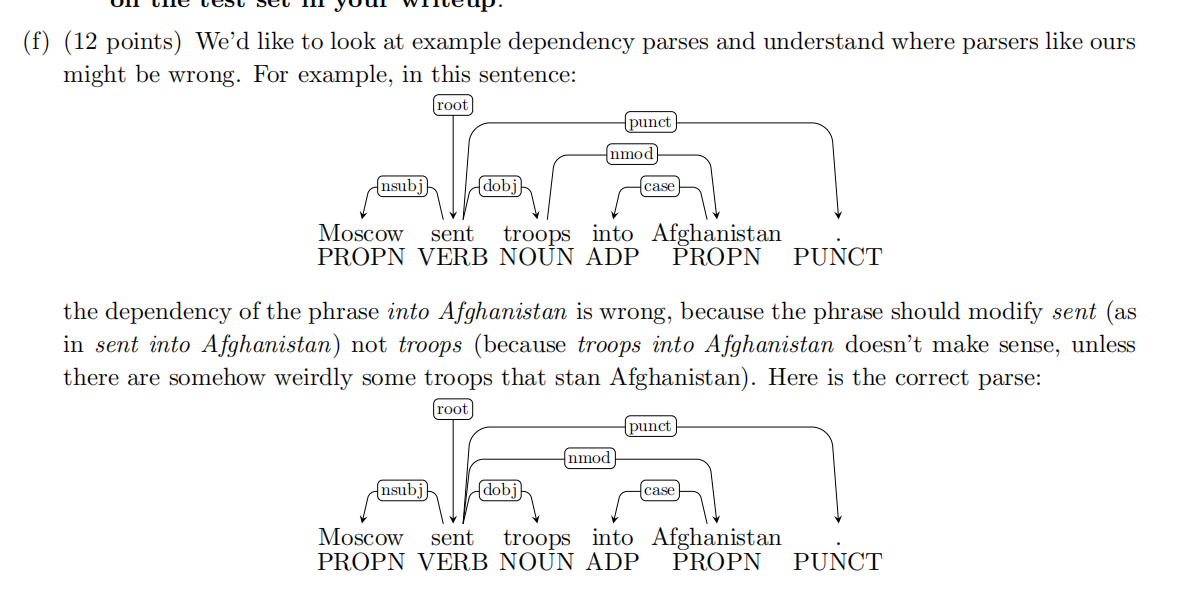

More generally, here are four types of parsing error:

Prepositional Phrase Attachment Error(介词短语附件错误):In the example above, the phrase into Afghanistan
is a prepositional phrase. A Prepositional Phrase Attachment Error is when a prepositional
phrase is attached to the wrong head word (in this example, troops is the wrong head word and
sent is the correct head word). More examples of prepositional phrases include with a rock,
before midnight and under the carpet.

Verb Phrase Attachment Error(动词短语附件错误):In the sentence Leaving the store unattended, I went
outside to watch the parade, the phrase leaving the store unattended is a verb phrase. A Verb Phrase Attachment Error is when a verb phrase is attached to the wrong head word (in this
example, the correct head word is went).

Modifier Attachment Error(修改器附件错误): In the sentence I am extremely short, the adverb extremely is
a modifier of the adjective short. A Modifier Attachment Error is when a modifier is attached
to the wrong head word (in this example, the correct head word is short).

Coordination Attachment Error(协调附件错误):In the sentence Would you like brown rice or garlic naan?,
the phrases brown rice and garlic naan are both conjuncts and the word or is the coordinating
conjunction. The second conjunct (here garlic naan) should be attached to the first conjunct
(here brown rice). A Coordination Attachment Error is when the second conjunct is attached
to the wrong head word (in this example, the correct head word is rice). Other coordinating
conjunctions include and, but and so.

In this question are four sentences with dependency parses obtained from a parser. Each sentence
has one error type, and there is one example of each of the four types above. For each sentence,
state the type of error, the incorrect dependency, and the correct dependency. While each sentence
should have a unique error type, there may be multiple possible correct dependencies for some of
the sentences. To demonstrate: for the example above, you would write:

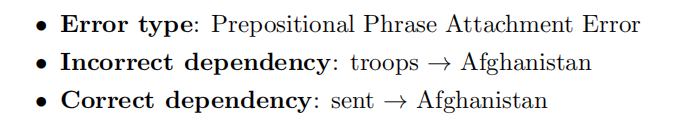

 There are lots of details and conventions for dependency annotation. If you want to
learn more about them, you can look at the UD website: http://universaldependencies.
org7 or the short introductory slides at: http://people.cs.georgetown.edu/nschneid/
p/UD-for-English.pdf. Note that you do not need to know all these details in order to do
this question. In each of these cases, we are asking about the attachment of phrases and it should
be sufficient to see if they are modifying the correct head. In particular, you do not need to look at
the labels on the the dependency edges – it suffices to just look at the edges themselves.

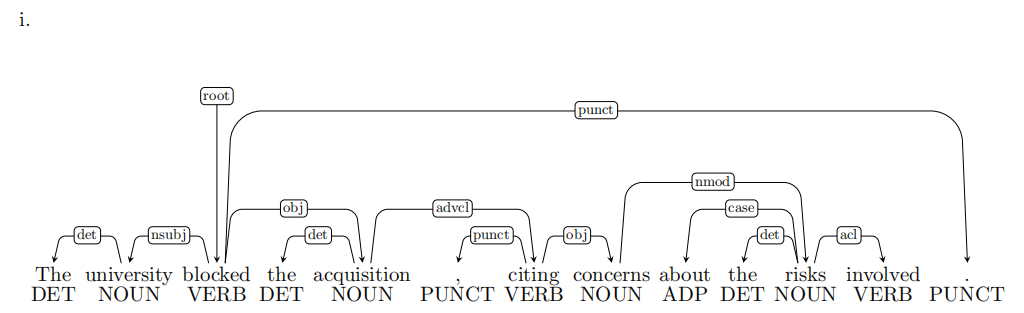

动词短语附件错误
citing -> blocked

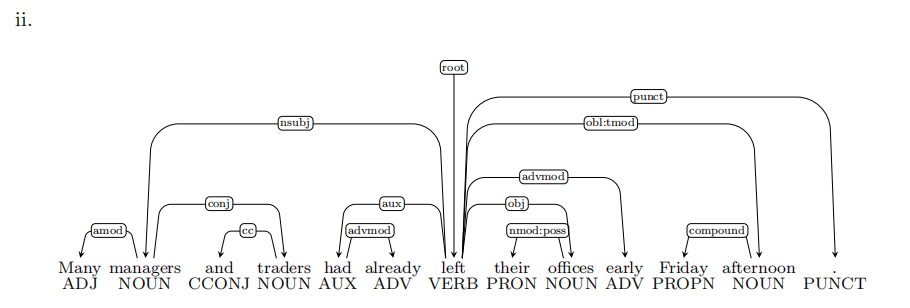

修饰错误 early -> afternoon

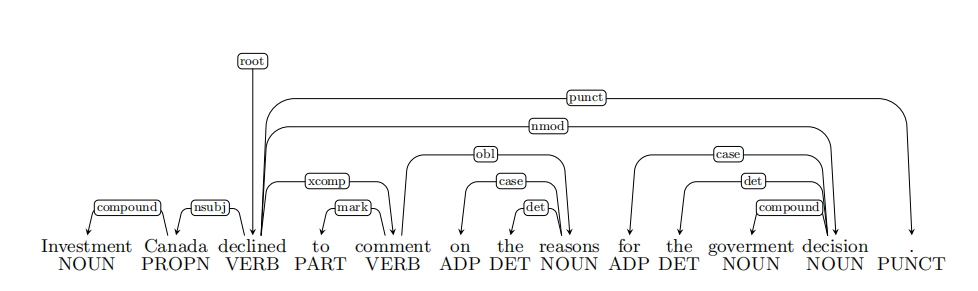

介词短语附件错误
declined -> reasons

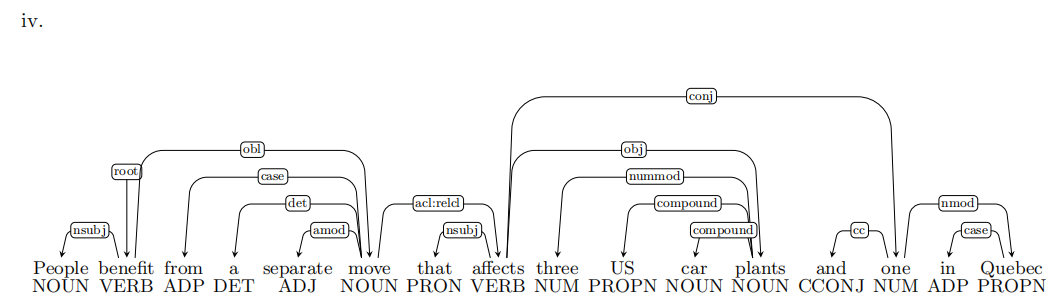

协调附件错误 one -> plants